In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, time, json
import pandas as pd
from openai import OpenAI
from tqdm.auto import tqdm
import spacy

import sys

sys.path.append("../../")
import os

import logging
from src.utils import logging_utils
from src.utils import env_utils
from src import functional
from datasets import load_dataset

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-08-31 16:13:19 __main__ INFO     torch.__version__='2.3.1', torch.version.cuda='12.1'
2024-08-31 16:13:19 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=1, torch.cuda.get_device_name()='NVIDIA RTX A6000'
2024-08-31 16:13:19 __main__ INFO     transformers.__version__='4.44.2'


2024-08-31 16:19:44 src.utils.experiment_utils INFO     setting all seeds to 123
2024-08-31 16:19:44 __main__ INFO     layer_name='model.layers.0'


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:10<00:00, 38.71it/s]

2024-08-31 16:19:55 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 75.79it/s] 


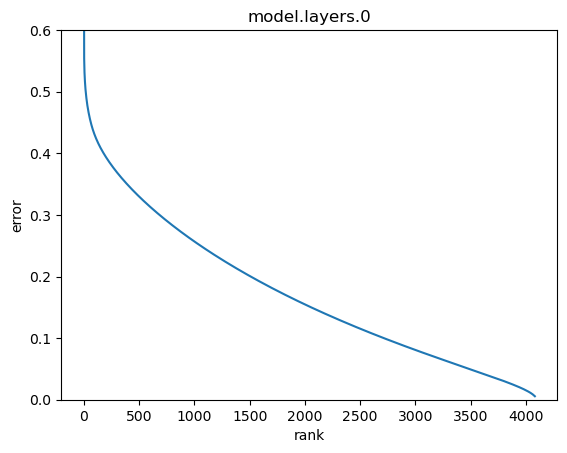

2024-08-31 16:20:04 __main__ INFO     layer_name='model.layers.1'


100%|██████████| 400/400 [00:10<00:00, 38.67it/s]


2024-08-31 16:20:14 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 75.26it/s] 


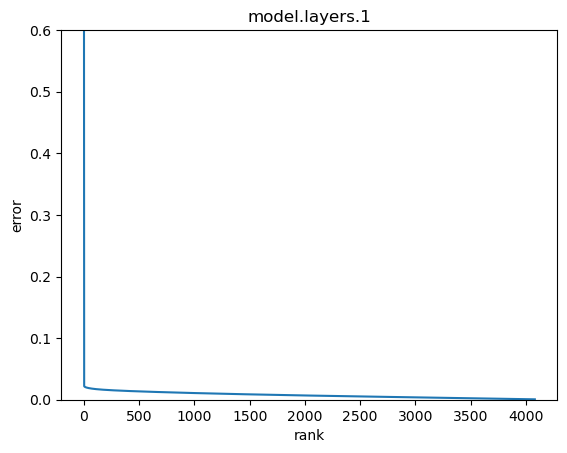

2024-08-31 16:20:23 __main__ INFO     layer_name='model.layers.2'


100%|██████████| 400/400 [00:10<00:00, 39.17it/s]

2024-08-31 16:20:33 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 75.02it/s] 


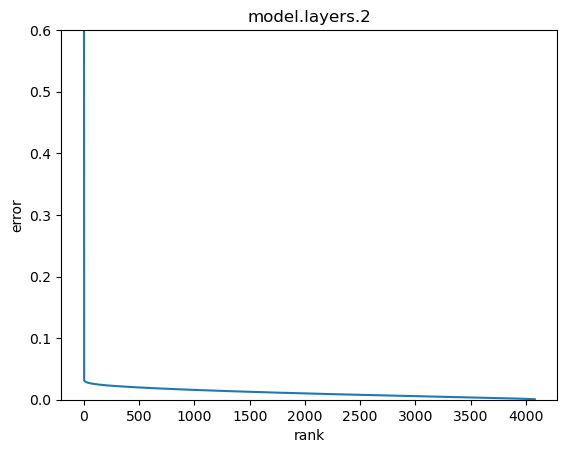

2024-08-31 16:20:42 __main__ INFO     layer_name='model.layers.3'


100%|██████████| 400/400 [00:10<00:00, 37.67it/s]

2024-08-31 16:20:53 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.79it/s] 


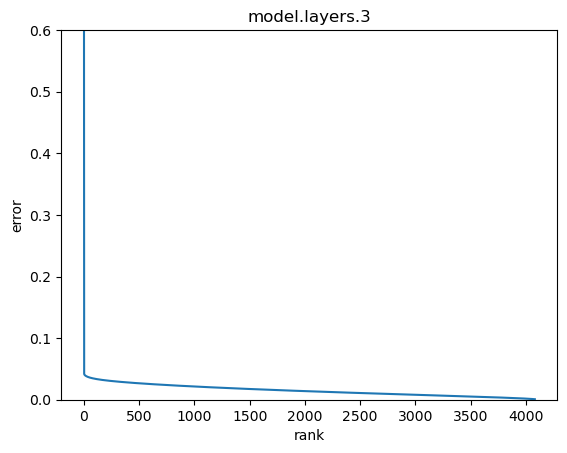

2024-08-31 16:21:01 __main__ INFO     layer_name='model.layers.4'


100%|██████████| 400/400 [00:10<00:00, 37.75it/s]


2024-08-31 16:21:12 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.70it/s] 


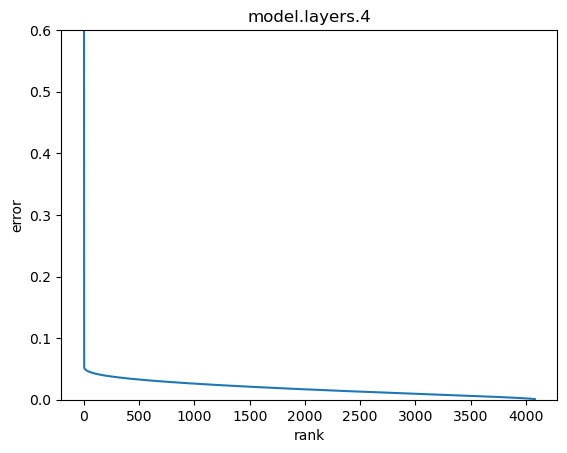

2024-08-31 16:21:21 __main__ INFO     layer_name='model.layers.5'


100%|██████████| 400/400 [00:10<00:00, 38.11it/s]

2024-08-31 16:21:31 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.61it/s] 


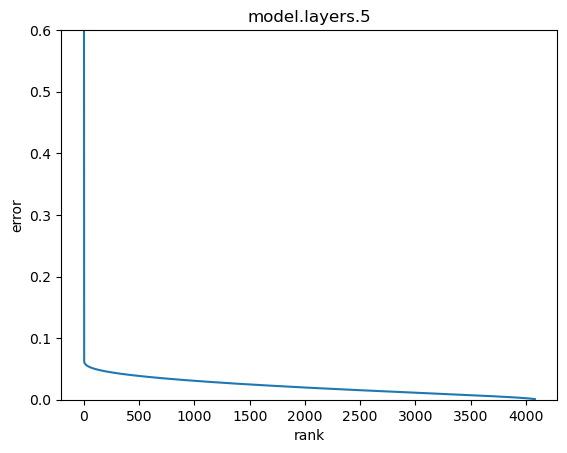

2024-08-31 16:21:40 __main__ INFO     layer_name='model.layers.6'


100%|██████████| 400/400 [00:10<00:00, 38.59it/s]

2024-08-31 16:21:51 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.38it/s] 


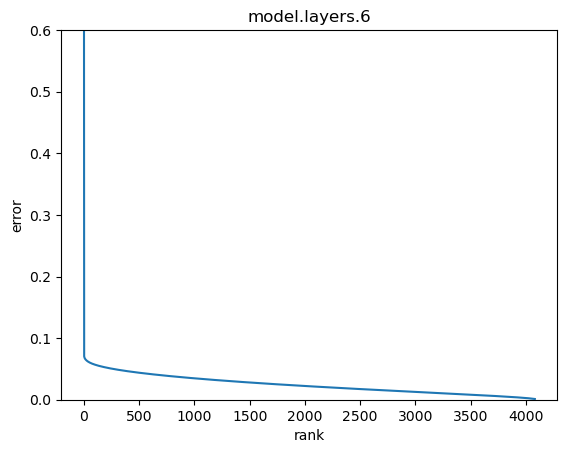

2024-08-31 16:22:00 __main__ INFO     layer_name='model.layers.7'


100%|██████████| 400/400 [00:10<00:00, 38.48it/s]

2024-08-31 16:22:10 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.48it/s] 


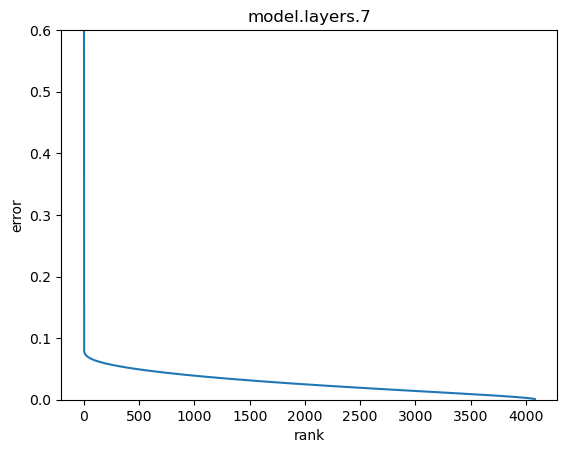

2024-08-31 16:22:19 __main__ INFO     layer_name='model.layers.8'


100%|██████████| 400/400 [00:10<00:00, 38.86it/s]

2024-08-31 16:22:29 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.34it/s] 


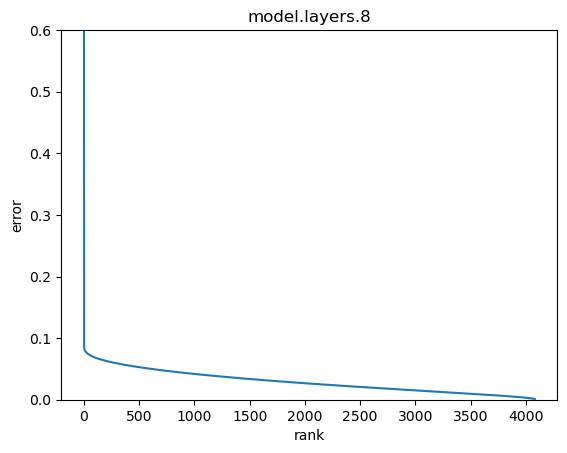

2024-08-31 16:22:38 __main__ INFO     layer_name='model.layers.9'


100%|██████████| 400/400 [00:10<00:00, 38.76it/s]

2024-08-31 16:22:49 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.31it/s] 


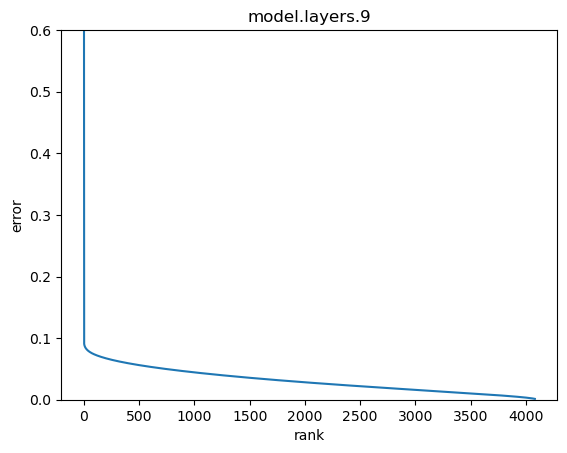

2024-08-31 16:22:57 __main__ INFO     layer_name='model.layers.10'


100%|██████████| 400/400 [00:10<00:00, 38.76it/s]


2024-08-31 16:23:08 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.39it/s] 


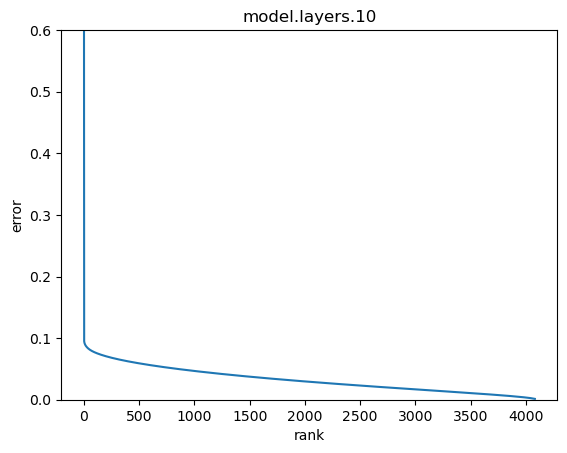

2024-08-31 16:23:17 __main__ INFO     layer_name='model.layers.11'


100%|██████████| 400/400 [00:10<00:00, 38.78it/s]

2024-08-31 16:23:27 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.31it/s] 


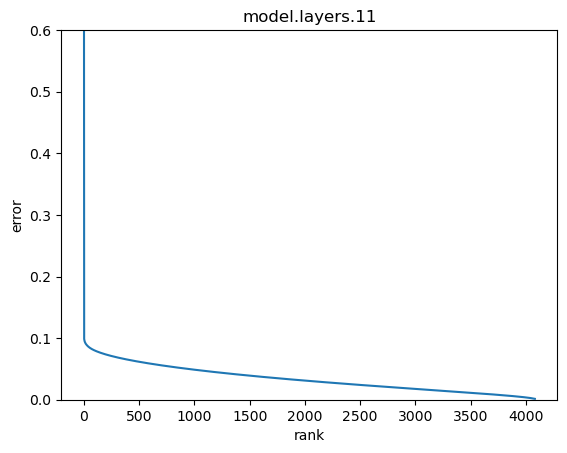

2024-08-31 16:23:36 __main__ INFO     layer_name='model.layers.12'


100%|██████████| 400/400 [00:10<00:00, 38.59it/s]

2024-08-31 16:23:46 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.26it/s] 


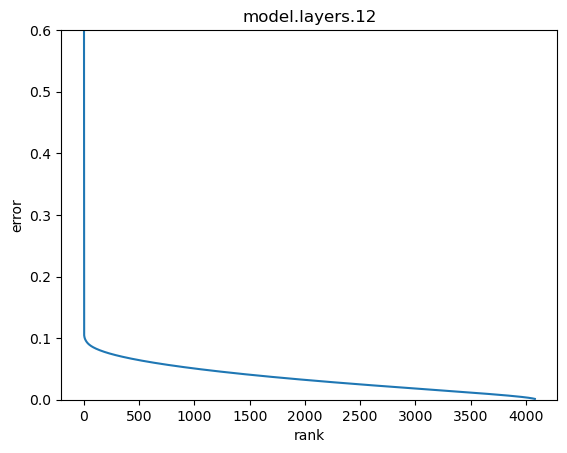

2024-08-31 16:23:55 __main__ INFO     layer_name='model.layers.13'


100%|██████████| 400/400 [00:10<00:00, 38.74it/s]

2024-08-31 16:24:06 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.29it/s] 


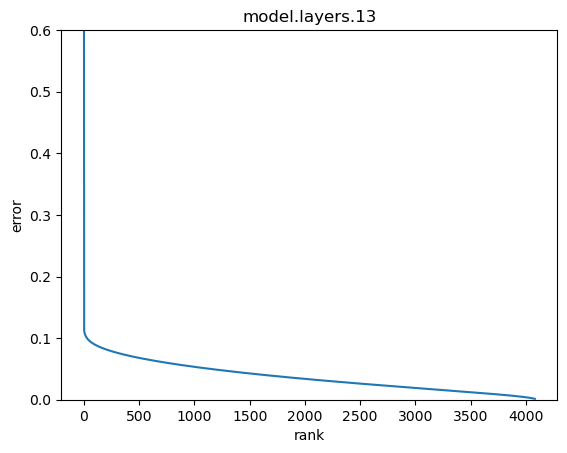

2024-08-31 16:24:15 __main__ INFO     layer_name='model.layers.14'


100%|██████████| 400/400 [00:10<00:00, 38.82it/s]

2024-08-31 16:24:25 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.22it/s] 


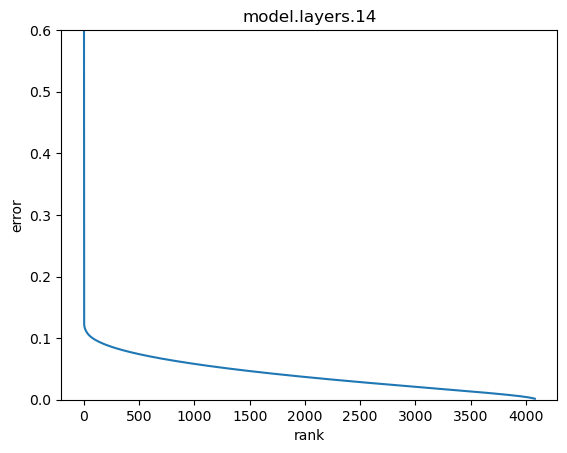

2024-08-31 16:24:34 __main__ INFO     layer_name='model.layers.15'


100%|██████████| 400/400 [00:10<00:00, 38.83it/s]


2024-08-31 16:24:44 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.25it/s] 


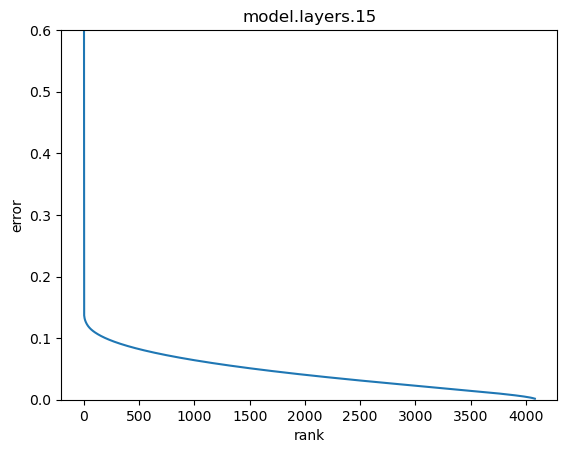

2024-08-31 16:24:53 __main__ INFO     layer_name='model.layers.16'


100%|██████████| 400/400 [00:10<00:00, 39.02it/s]


2024-08-31 16:25:03 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.15it/s] 


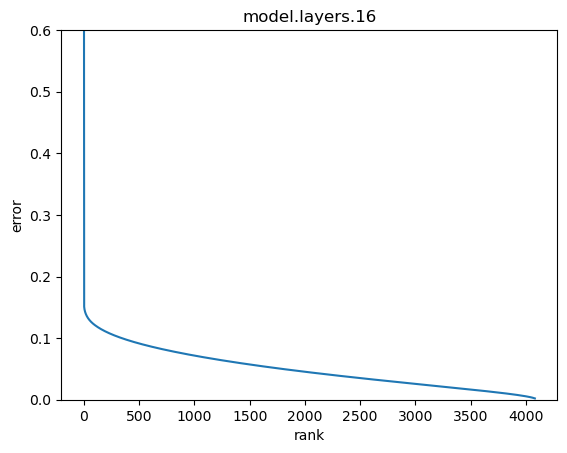

2024-08-31 16:25:12 __main__ INFO     layer_name='model.layers.17'


100%|██████████| 400/400 [00:10<00:00, 38.56it/s]


2024-08-31 16:25:23 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.27it/s] 


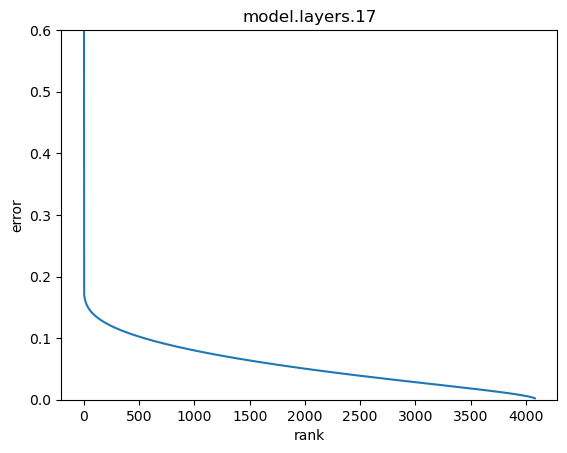

2024-08-31 16:25:32 __main__ INFO     layer_name='model.layers.18'


100%|██████████| 400/400 [00:10<00:00, 38.75it/s]

2024-08-31 16:25:42 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.21it/s] 


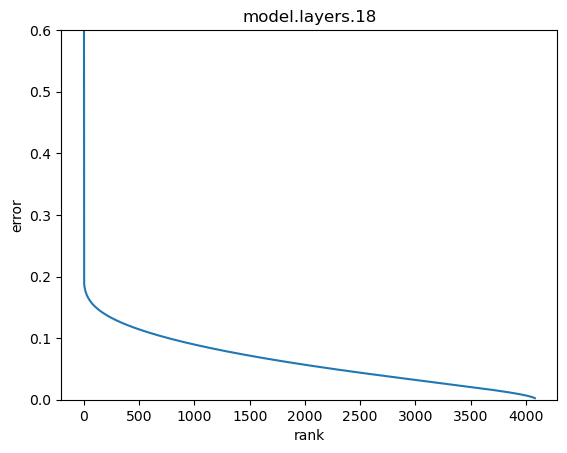

2024-08-31 16:25:51 __main__ INFO     layer_name='model.layers.19'


100%|██████████| 400/400 [00:10<00:00, 38.79it/s]

2024-08-31 16:26:01 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.20it/s] 


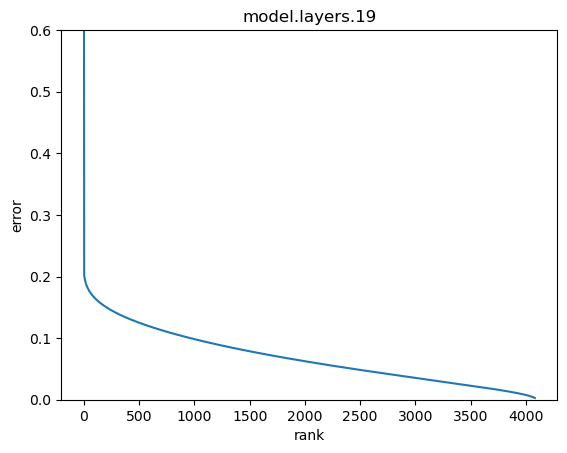

2024-08-31 16:26:10 __main__ INFO     layer_name='model.layers.20'


100%|██████████| 400/400 [00:10<00:00, 38.42it/s]

2024-08-31 16:26:21 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.25it/s] 


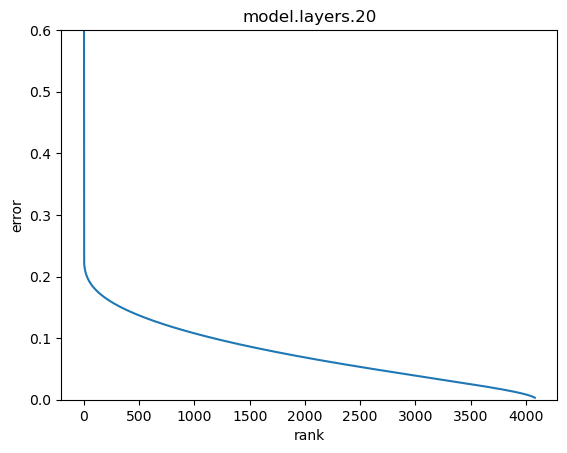

2024-08-31 16:26:30 __main__ INFO     layer_name='model.layers.21'


100%|██████████| 400/400 [00:10<00:00, 38.46it/s]


2024-08-31 16:26:40 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.23it/s] 


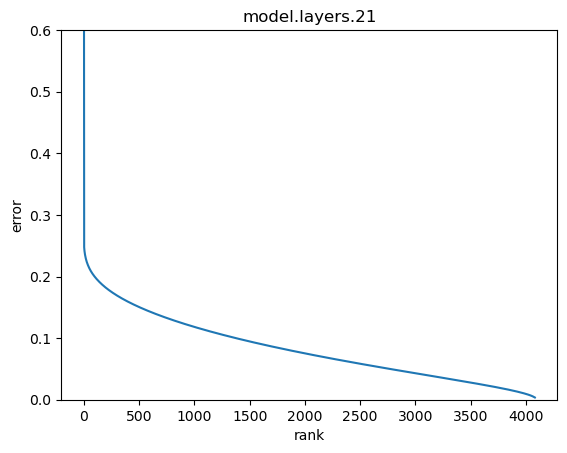

2024-08-31 16:26:49 __main__ INFO     layer_name='model.layers.22'


100%|██████████| 400/400 [00:10<00:00, 38.64it/s]


2024-08-31 16:27:00 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.19it/s] 


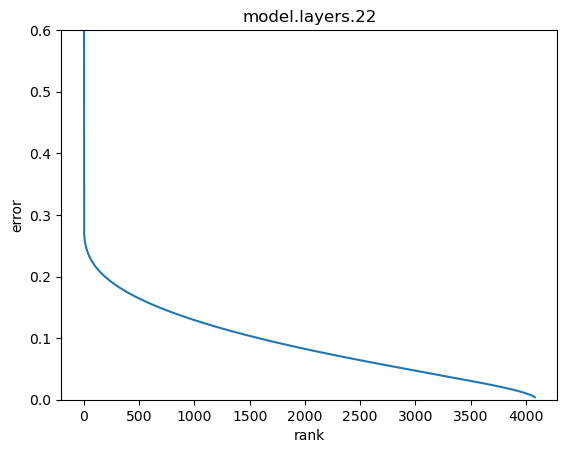

2024-08-31 16:27:09 __main__ INFO     layer_name='model.layers.23'


100%|██████████| 400/400 [00:10<00:00, 38.64it/s]

2024-08-31 16:27:19 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.21it/s] 


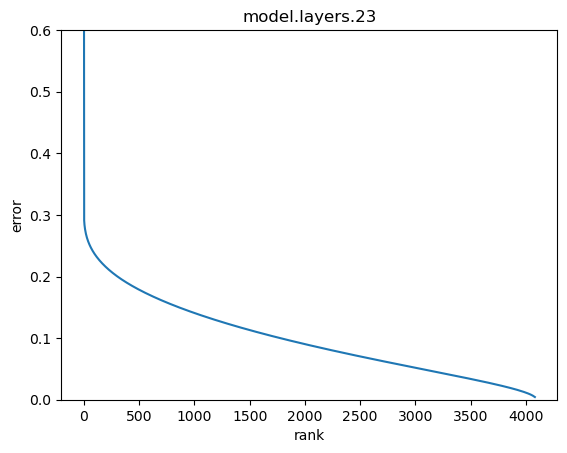

2024-08-31 16:27:28 __main__ INFO     layer_name='model.layers.24'


100%|██████████| 400/400 [00:10<00:00, 38.49it/s]


2024-08-31 16:27:38 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.22it/s] 


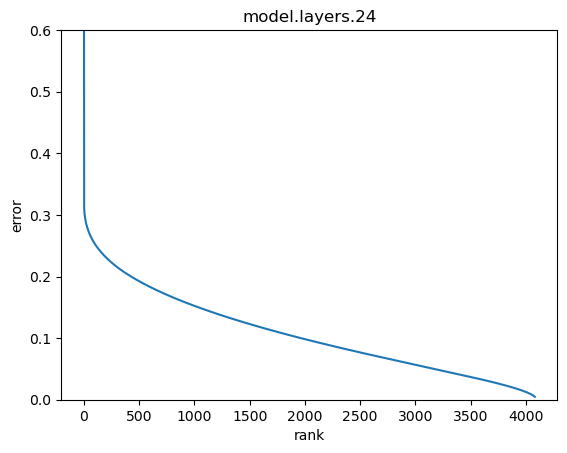

2024-08-31 16:27:47 __main__ INFO     layer_name='model.layers.25'


100%|██████████| 400/400 [00:10<00:00, 38.50it/s]

2024-08-31 16:27:58 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.13it/s] 


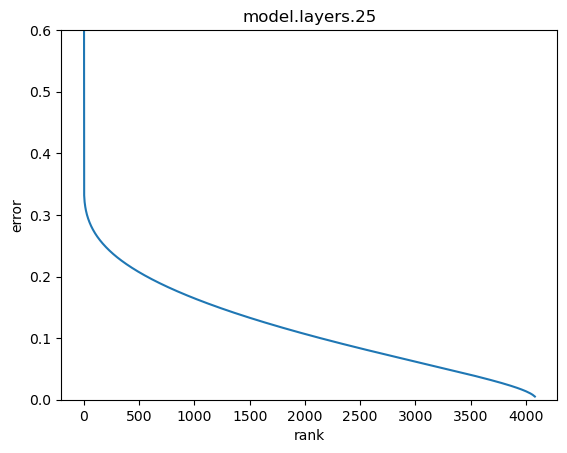

2024-08-31 16:28:07 __main__ INFO     layer_name='model.layers.26'


100%|██████████| 400/400 [00:10<00:00, 38.48it/s]


2024-08-31 16:28:17 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.17it/s] 


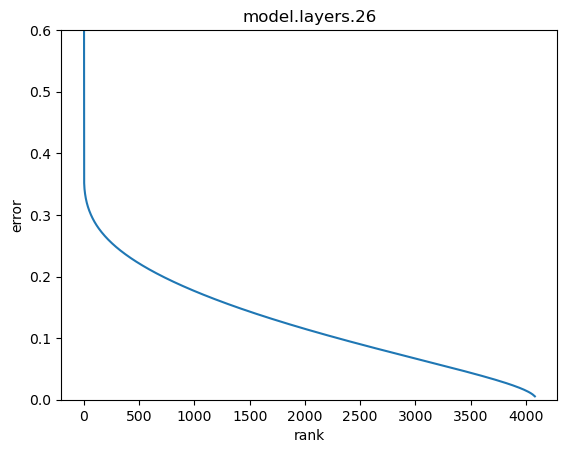

2024-08-31 16:28:26 __main__ INFO     layer_name='model.layers.27'


100%|██████████| 400/400 [00:10<00:00, 38.82it/s]


2024-08-31 16:28:36 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.14it/s] 


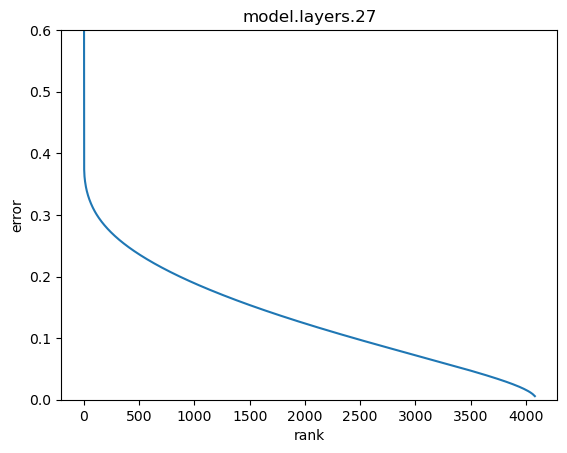

2024-08-31 16:28:45 __main__ INFO     layer_name='model.layers.28'


100%|██████████| 400/400 [00:10<00:00, 38.60it/s]

2024-08-31 16:28:56 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.10it/s] 


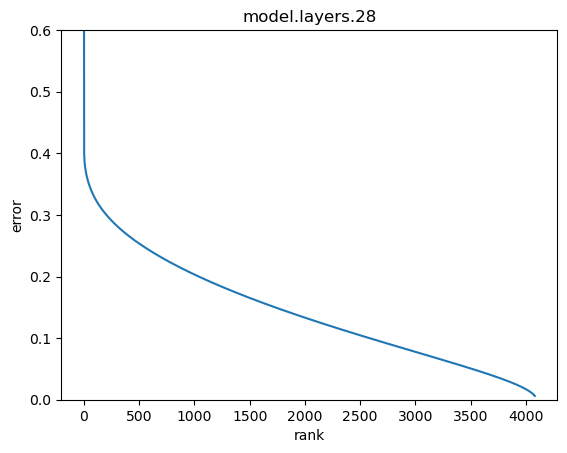

2024-08-31 16:29:05 __main__ INFO     layer_name='model.layers.29'


100%|██████████| 400/400 [00:10<00:00, 38.39it/s]

2024-08-31 16:29:15 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.05it/s] 


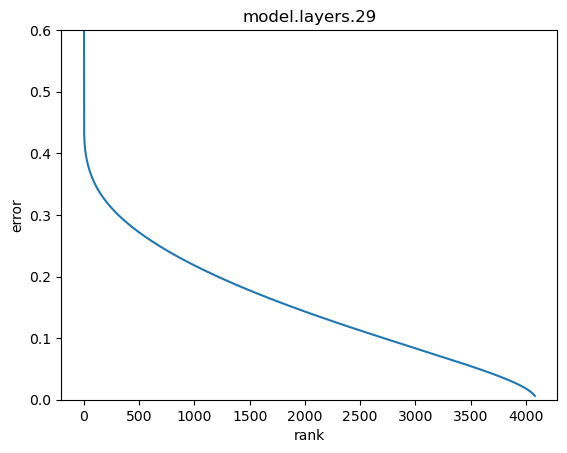

2024-08-31 16:29:24 __main__ INFO     layer_name='model.layers.30'


100%|██████████| 400/400 [00:10<00:00, 38.47it/s]


2024-08-31 16:29:35 __main__ INFO     torch.Size([4096, 21416])


100%|██████████| 435/435 [00:05<00:00, 74.08it/s] 


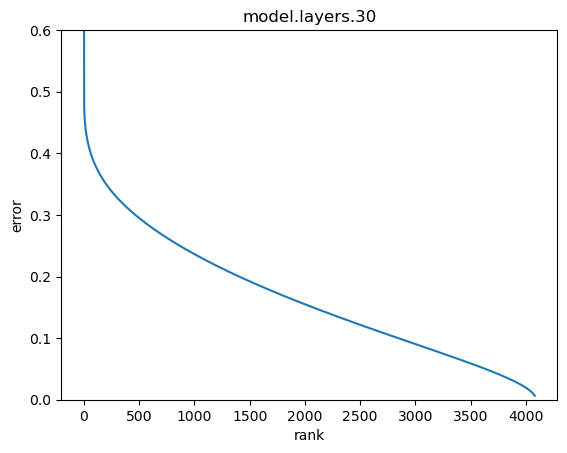

2024-08-31 16:29:44 __main__ INFO     layer_name='model.layers.31'


100%|██████████| 400/400 [00:10<00:00, 38.38it/s]

2024-08-31 16:29:54 __main__ INFO     torch.Size([4096, 21416])



100%|██████████| 435/435 [00:05<00:00, 74.01it/s] 


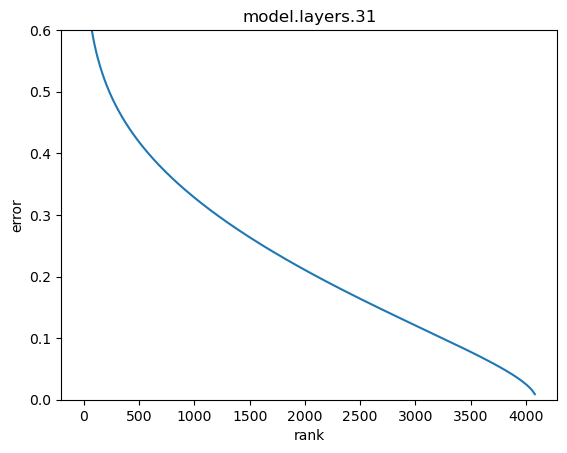

In [7]:
import numpy as np
from src.utils import experiment_utils
import matplotlib.pyplot as plt
from src.functional import free_gpu_cache

experiment_utils.set_seed(123)

cache_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "cache_states",
)

save_dir = os.path.join(env_utils.DEFAULT_RESULTS_DIR, "Figures", "rank_analysis")
os.makedirs(save_dir, exist_ok=True)

layer_name_format = "model.layers.{}"
n_layer = 32

for l_idx in range(n_layer):
    layer_name = layer_name_format.format(l_idx)
    logger.info(f"{layer_name=}")

    all_states = None
    for cache_file in tqdm(os.listdir(cache_dir)):
        if cache_file.endswith(".npz"):
            caches = np.load(os.path.join(cache_dir, cache_file))[layer_name][
                0
            ]  # [1, n_seq, dim]
            if all_states is None:
                all_states = caches
            else:
                all_states = np.concatenate([all_states, caches], axis=0)

    all_states = torch.Tensor(all_states).T.cuda()
    logger.info(all_states.shape)

    U, S, Vh = torch.linalg.svd(all_states, full_matrices=False)

    ranks = []
    dists = []

    resolutions = (
        list(range(100)) + list(range(100, 1000, 5)) + list(range(1000, S.shape[0], 20))
    )
    for rank in tqdm(resolutions):
        ranks.append(rank)
        M = U[:, :rank] @ torch.diag(S[:rank]) @ Vh[:rank, :]
        dists.append((torch.norm(all_states - M) / all_states.norm()).item())

    plt.plot(ranks, dists)
    plt.xlabel("rank")
    plt.ylabel("error")
    plt.title(f"{layer_name}")

    plt.ylim(0, 0.6)

    plt.savefig(os.path.join(save_dir, f"{layer_name}.png"), dpi=300)

    plt.show()

    free_gpu_cache()